In [1]:
%matplotlib inline 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import os

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2, L1, L1L2
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
model = Sequential([
    Input(shape = (20, 20, 3)),
    Conv2D(filters = 32, kernel_size = (3,3), padding= "same", activation= "relu"),
    Conv2D(filters = 32, kernel_size = (3,3), padding= "same", activation= "relu"),
    MaxPool2D(),
    Conv2D(filters = 16, kernel_size = (3,3), padding= "same", activation= "relu"),
    Conv2D(filters = 16, kernel_size = (3,3), padding= "same", activation= "relu"),
    MaxPool2D(),
    Conv2D(filters = 3, kernel_size = (1,1), padding= "same", activation= "relu"),
    MaxPool2D(),
    Flatten(),
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                    

In [5]:
model.layers[4].bias.numpy().shape

(16,)

In [6]:
model.layers[2].weights

[]

In [7]:
random_images = np.random.uniform(size = (5,20,20,3))

In [8]:
model.predict(random_images)

1/1 [==============================] - 0s 177ms/step


array([[0.        , 0.05601454, 0.        , 0.        , 0.05191388,
        0.        , 0.        , 0.07461108, 0.03781899, 0.        ,
        0.08028403, 0.        ],
       [0.        , 0.07130223, 0.        , 0.        , 0.04452994,
        0.        , 0.        , 0.05382895, 0.        , 0.        ,
        0.10665227, 0.        ],
       [0.01370005, 0.07531948, 0.        , 0.        , 0.06907401,
        0.00137884, 0.        , 0.05481201, 0.        , 0.        ,
        0.04992894, 0.        ],
       [0.        , 0.05481099, 0.00118522, 0.        , 0.05563683,
        0.005839  , 0.        , 0.04606609, 0.        , 0.        ,
        0.06525616, 0.        ],
       [0.01179208, 0.08153179, 0.        , 0.        , 0.05681844,
        0.01123477, 0.0137267 , 0.10266896, 0.        , 0.        ,
        0.05788077, 0.01601563]], dtype=float32)

In [9]:
vgg19 = VGG19()

In [10]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
generator = ImageDataGenerator()

In [13]:
images = generator.flow_from_directory("./data/natural_images/")

Found 6899 images belonging to 8 classes.


In [14]:
type(images)

keras.preprocessing.image.DirectoryIterator

In [16]:
img = images.__next__()[0]

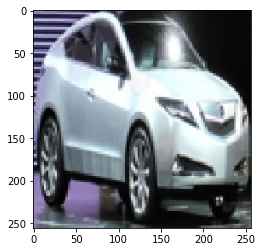

In [18]:
plt.imshow(img[0]/255.0)

In [19]:
tf.data.Dataset.from_tensor_slices([1, 2, 3])

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [24]:
list(os.walk("./data/natural_images"))

[('./data/natural_images/',
  ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'],
  []),
 ('./data/natural_images/airplane',
  [],
  ['airplane_0000.jpg',
   'airplane_0001.jpg',
   'airplane_0002.jpg',
   'airplane_0003.jpg',
   'airplane_0004.jpg',
   'airplane_0005.jpg',
   'airplane_0006.jpg',
   'airplane_0007.jpg',
   'airplane_0008.jpg',
   'airplane_0009.jpg',
   'airplane_0010.jpg',
   'airplane_0011.jpg',
   'airplane_0012.jpg',
   'airplane_0013.jpg',
   'airplane_0014.jpg',
   'airplane_0015.jpg',
   'airplane_0016.jpg',
   'airplane_0017.jpg',
   'airplane_0018.jpg',
   'airplane_0019.jpg',
   'airplane_0020.jpg',
   'airplane_0021.jpg',
   'airplane_0022.jpg',
   'airplane_0023.jpg',
   'airplane_0024.jpg',
   'airplane_0025.jpg',
   'airplane_0026.jpg',
   'airplane_0027.jpg',
   'airplane_0028.jpg',
   'airplane_0029.jpg',
   'airplane_0030.jpg',
   'airplane_0031.jpg',
   'airplane_0032.jpg',
   'airplane_0033.jpg',
   'airplane_0034.jpg',
   '

In [109]:
BASE_DIR = "./data/natural_images/"
IMAGE_SIZE = (256, 256)

classes = os.listdir(BASE_DIR)
folder_names = [os.path.join(BASE_DIR, class_name) for class_name in classes]

In [110]:
classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [111]:
folder_names

['./data/natural_images/airplane',
 './data/natural_images/car',
 './data/natural_images/cat',
 './data/natural_images/dog',
 './data/natural_images/flower',
 './data/natural_images/fruit',
 './data/natural_images/motorbike',
 './data/natural_images/person']

In [112]:
all_files = []
all_classes = []

for folder_name,class_name in zip(folder_names, classes):
    files = os.listdir(folder_name)
    all_files.extend([os.path.join(folder_name, file) for file in files])
    all_classes.extend([class_name] * len(files))

In [113]:
len(all_files)

6899

In [114]:
len(all_classes)

6899

In [115]:
class_mapping = {class_name: class_id for (class_id, class_name) in list(enumerate(classes))}
class_mapping

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [116]:
all_class_ids = [class_mapping[c] for c in all_classes]

In [117]:
all_files[0]

'./data/natural_images/airplane\\airplane_0000.jpg'

In [118]:
all_class_ids[0]

0

In [119]:
def read_image(image_filename, image_class):
    image_file = tf.io.read_file(image_filename)
    image = tf.image.decode_jpeg(image_file)
    image_scaled = tf.cast(image, float) / 255.0
    image_resized = tf.image.resize(image_scaled, IMAGE_SIZE)
    return image_resized, image_class

In [135]:
dataset = tf.data.Dataset \
    .from_tensor_slices((all_files, all_class_ids)) \
    .shuffle(len(all_files)) \
    .map(read_image) \
    .batch(4) \
    .repeat()

In [136]:
for s in dataset.take(1):
    print(s[0].numpy().shape, s[1].numpy().shape)

(4, 256, 256, 3) (4,)


In [137]:
for el in dataset.take(5):
    print(el[0].numpy(), el[1].numpy())

[[[[4.40716930e-02 8.32873806e-02 8.72089490e-02]
   [2.10324768e-02 6.02481626e-02 6.41697347e-02]
   [4.15747575e-02 8.07904452e-02 8.47120136e-02]
   ...
   [7.17693031e-01 6.61228597e-01 5.56127489e-01]
   [6.29840732e-01 5.58946133e-01 4.59022701e-01]
   [6.71200991e-01 5.86182594e-01 4.91436899e-01]]

  [[3.07705179e-02 6.99862093e-02 7.39077777e-02]
   [3.79155800e-02 7.71312639e-02 8.10528323e-02]
   [6.22691140e-02 1.01484805e-01 1.05406374e-01]
   ...
   [6.77451015e-01 6.20986521e-01 5.15885413e-01]
   [6.20405376e-01 5.49510777e-01 4.49587345e-01]
   [7.11792529e-01 6.26774132e-01 5.32028437e-01]]

  [[3.80113497e-02 7.72270411e-02 8.11486095e-02]
   [8.45773146e-02 1.23792998e-01 1.27714574e-01]
   [1.65929437e-01 2.05145121e-01 2.09066689e-01]
   ...
   [6.60804510e-01 6.04340076e-01 4.99238968e-01]
   [6.54718161e-01 5.83823562e-01 4.84962642e-01]
   [7.49086022e-01 6.64067626e-01 5.71366966e-01]]

  ...

  [[6.06780708e-01 5.59721887e-01 5.04819930e-01]
   [6.15782559e-

In [138]:
model = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(filters = 32, kernel_size = (3,3), padding= "same", activation= "relu"),
    Conv2D(filters = 32, kernel_size = (3,3), padding= "same", activation= "relu"),
    MaxPool2D(),
    Conv2D(filters = 16, kernel_size = (3,3), padding= "same", activation= "relu"),
    Conv2D(filters = 16, kernel_size = (3,3), padding= "same", activation= "relu"),
    MaxPool2D(),
    Conv2D(filters = 8, kernel_size = (3,3), padding= "same", activation= "relu"),
    Conv2D(filters = 8, kernel_size = (3,3), padding= "same", activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(23, activation='relu'),
    Dense(8, activation='softmax')
])

In [139]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [141]:
total_steps = len(all_files) // 4

In [143]:
model.fit(dataset, epochs = 10, steps_per_epoch = total_steps)

Epoch 1/10
 806/1724 [=============>................] - ETA: 4:35 - loss: 1.1513

KeyboardInterrupt: 